In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 

In [3]:
def plot_Lat_LT_data_from_netcdf(nc_filename):
    ds = xr.open_dataset(nc_filename)
    
    # Extract latitude, time, and seasonal data
    lat = ds['lat'].values
    time = ds['time'].values
    seasonal_data = [ds[season].values for season in ds.data_vars]
    season_names = list(ds.data_vars.keys())

    vmin_waccm = 0
    vmax_waccm = 15
    no_levels = (vmax_waccm - vmin_waccm ) +1
    cmap = plt.get_cmap('jet')

    # Create the subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
    
    for i, (season, data) in enumerate(zip(season_names, seasonal_data)):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        contour = ax.contourf(
            time, lat, data,
            levels=np.linspace(vmin_waccm, vmax_waccm, no_levels),
            cmap=cmap,
            vmin=vmin_waccm, vmax=vmax_waccm
        )
        
        ax.set_title(f"{season}", fontsize=10.5)
        if row == 1:
            ax.set_xlabel("Local Time / hrs")
        if col == 0:
            ax.set_ylabel("Latitude")
            xticks_waccm = np.linspace(0, 24, 13)
            ax.set_xticks(xticks_waccm)
            ax.set_xticklabels(xticks_waccm.astype(int))  
        ax.set_yticks(np.linspace(-90, 90, 7))
        ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
        cbar = fig.colorbar(contour, ax=ax, pad=0.04)
        cbar.set_label('Occurance frequency (%)')

    plt.tight_layout()
    plt.show()


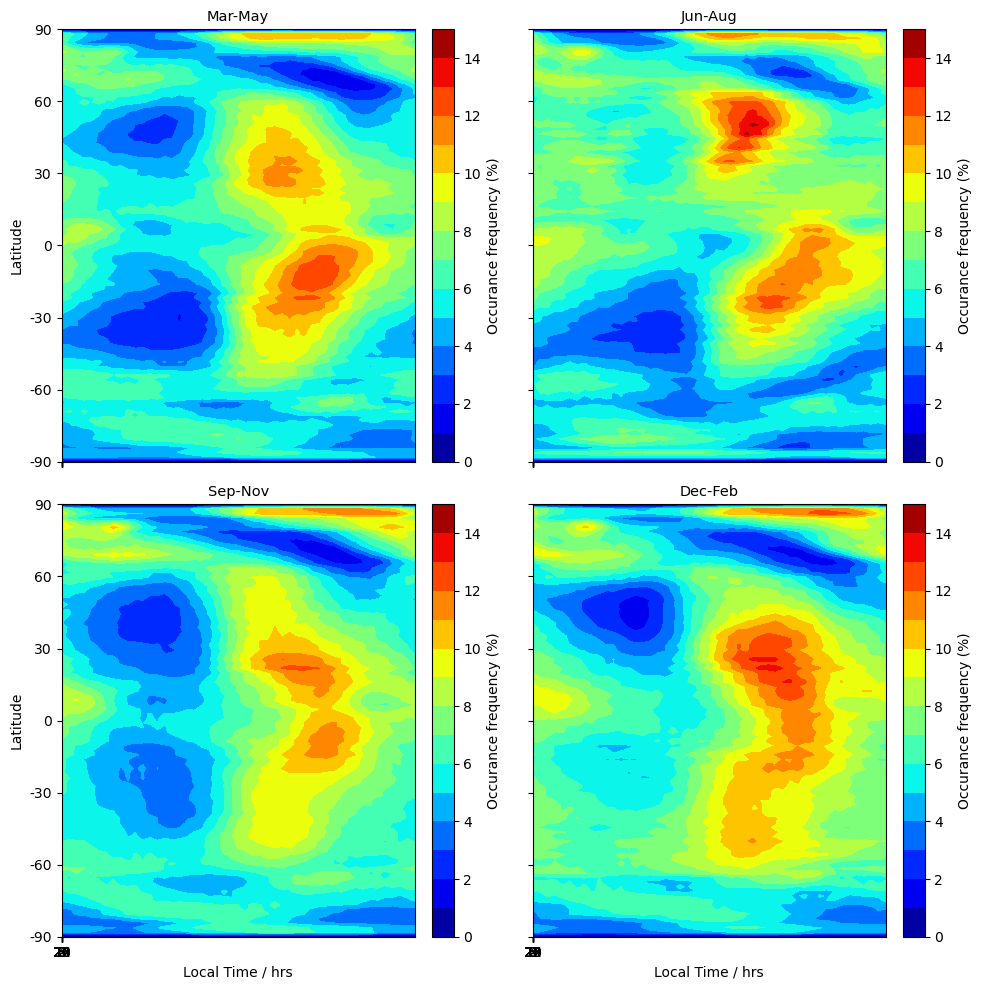

In [4]:
plot_Lat_LT_data_from_netcdf("Nc_Files/seasonal_occurrence_frequency_LT_SMax.nc")

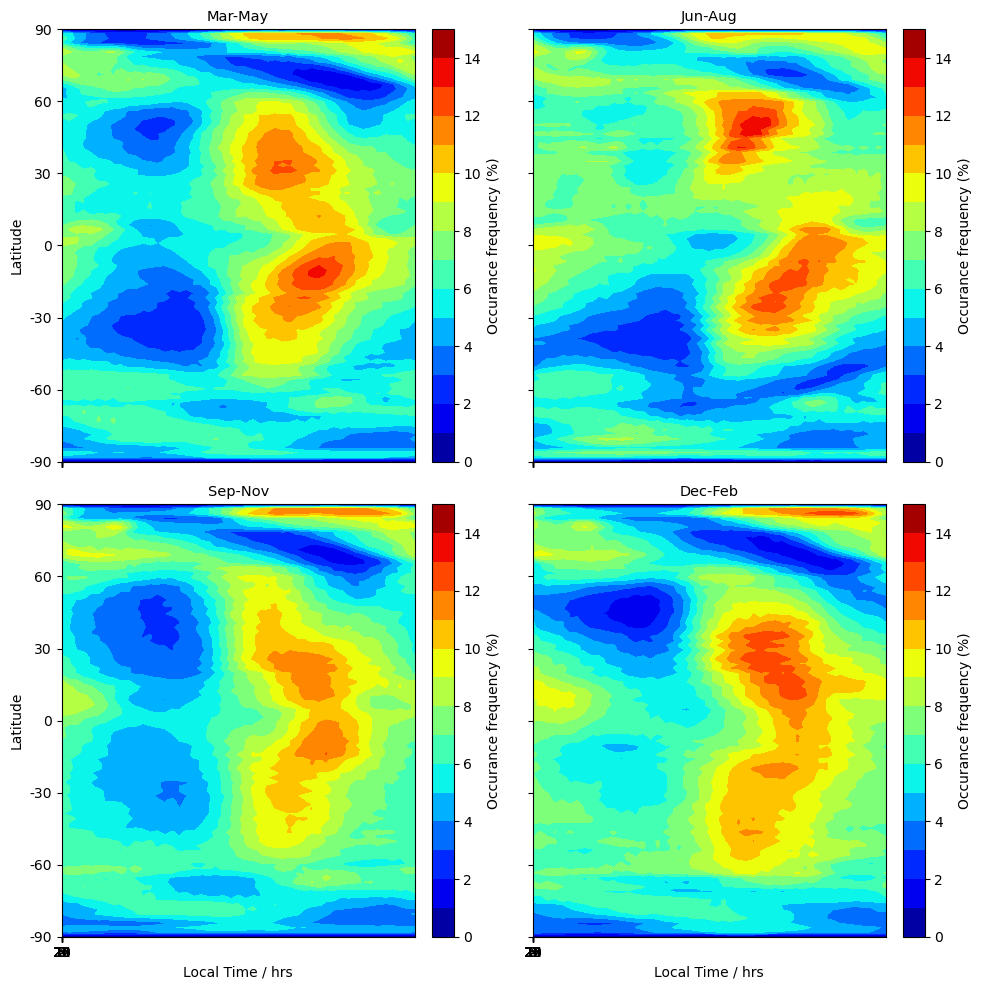

In [5]:
plot_Lat_LT_data_from_netcdf("Nc_Files/seasonal_occurrence_frequency_LT_SMin.nc")

In [31]:
#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

In [34]:
def plot_Lat_LT_average_line_from_netcdf(nc_filename1, nc_filename2):
    # Open both datasets
    ds1 = xr.open_dataset(nc_filename1)
    ds2 = xr.open_dataset(nc_filename2)
    
    # Get time values (assuming both have same time dimension)
    # time = ds1['time'].values / 3600000000000
    # timeplot = np.linspace(0, 24, 49)
    
    # Extract seasonal data from both datasets
    seasonal_data1 = {season: ds1[season].values for season in ds1.data_vars}
    seasonal_data2 = {season: ds2[season].values for season in ds2.data_vars}
    
    # Get season names (assuming both datasets have same seasons)
    season_names = list(seasonal_data1.keys())
    
    # Compute the average over the latitude dimension for each season in both datasets
    avg_data1 = {season: np.mean(data, axis=0) for season, data in seasonal_data1.items()}
    avg_data2 = {season: np.mean(data, axis=0) for season, data in seasonal_data2.items()}
    
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()
    
    # Color cycles to distinguish between datasets
    # colors1 = plt.cm.Blues(np.linspace(0.4, 0.8, len(season_names)))
    # colors2 = plt.cm.Reds(np.linspace(0.4, 0.8, len(season_names)))
    
    for i, (season, avg_values1) in enumerate(avg_data1.items()):
        ax = axes[i]
        
        # Plot data from first dataset
        ax.plot(timeplot, avg_values1, label=f"SMax", 
                color='red', linewidth=2, linestyle='-')
        
        # Plot data from second dataset
        ax.plot(timeplot, avg_data2[season], label=f"SMin", 
                color='blue', linewidth=2, linestyle='--')
        
        # Set labels and title for each subplot
        ax.set_title(f"Average Value for {season}", fontsize=12)
        ax.set_xlabel("Local Time / hrs", fontsize=10)
        ax.set_ylabel("Average Value (%)", fontsize=10)
        
        # Set x-ticks
        xticks_waccm = np.linspace(0, 24, 13)
        ax.set_xticks(xticks_waccm)
        ax.set_xticklabels(xticks_waccm.astype(int))
        
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(title="Run", fontsize=8)

    # print("Time values:", time)
    # print("First dataset seasons:", list(seasonal_data1.keys()))
    # print("Sample avg_values:", avg_values1)
    
    plt.suptitle("Comparison of Average occurace rates", fontsize=16)
    plt.tight_layout()
    plt.show()

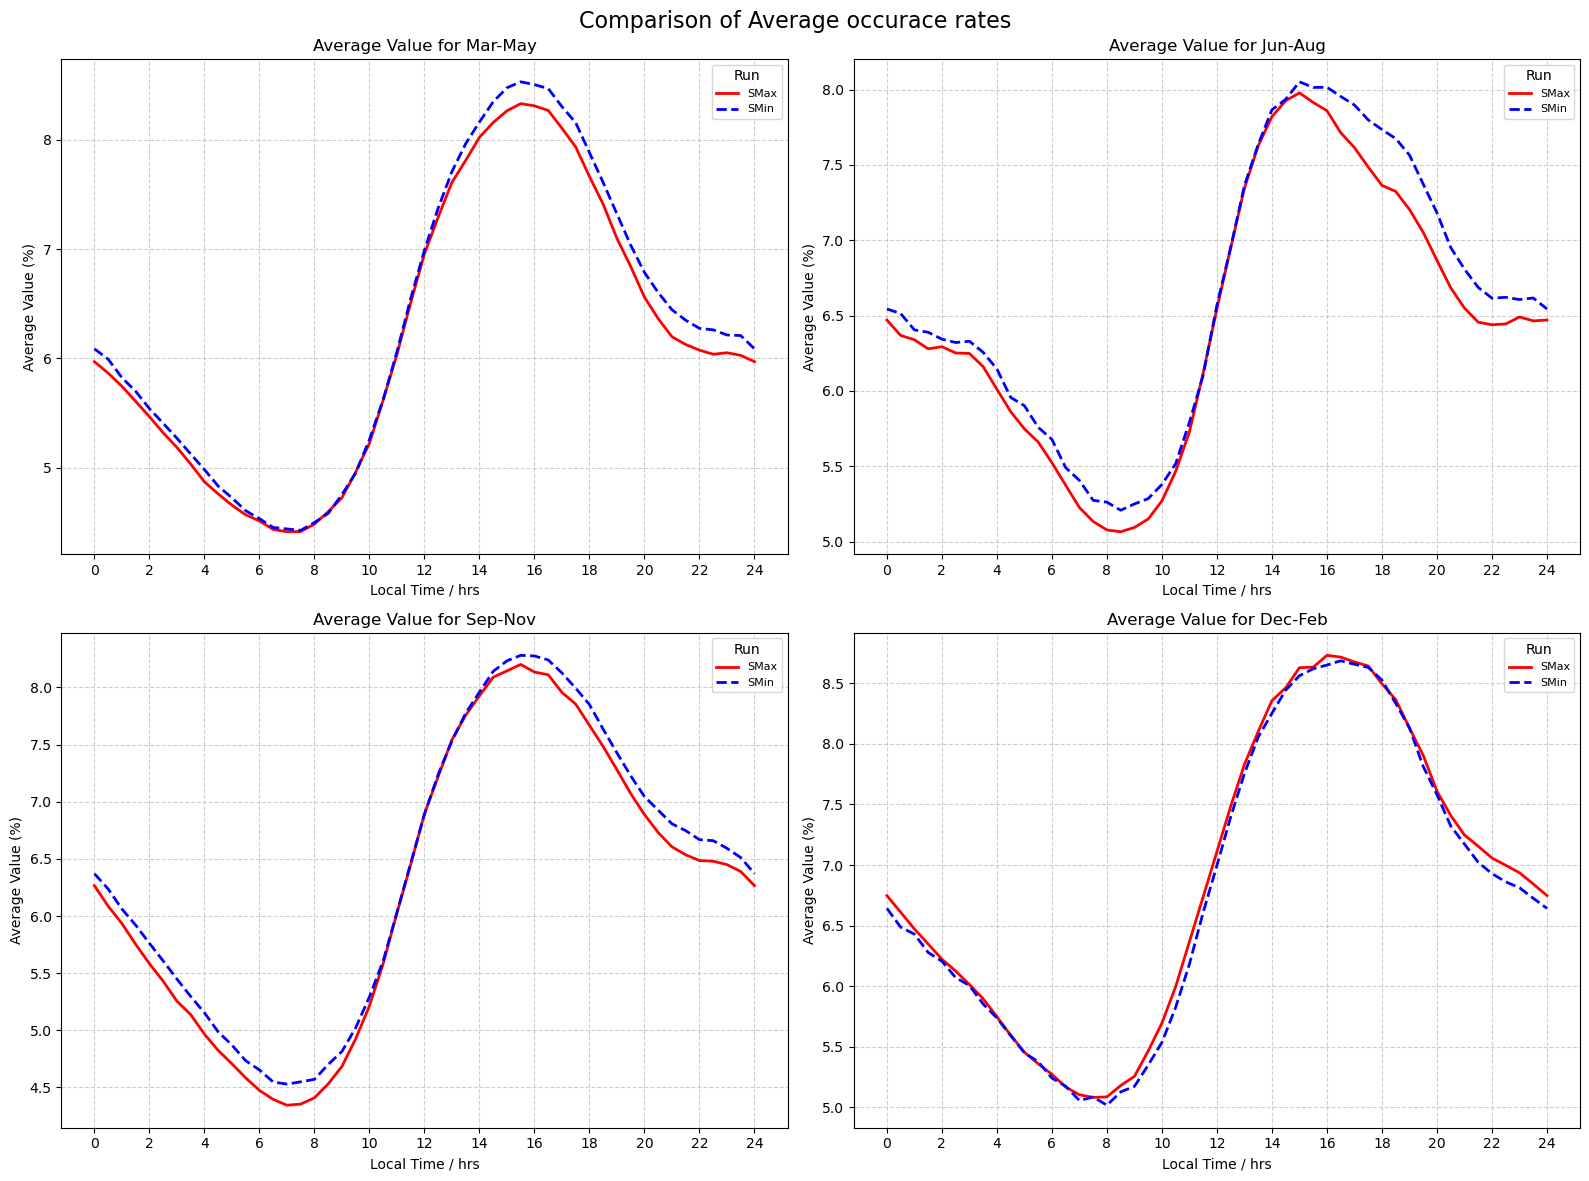

In [35]:
plot_Lat_LT_average_line_from_netcdf("Nc_Files/seasonal_occurrence_frequency_LT_SMax.nc", "Nc_Files/seasonal_occurrence_frequency_LT_SMin.nc")